In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [2]:
def cos_similarity(vector1, vector2):    

    cos = np.dot(vector1, vector2) / (np.linalg.norm(vector1)*np.linalg.norm(vector2))

    return cos

In [3]:
def SSM(chromagram):

    num_frames = chromagram.shape[1]

    ssm = np.zeros([num_frames, num_frames])

    for i in range(num_frames):
        for j in range(num_frames):
            ssm[i, j] = cos_similarity(chromagram[:, i], chromagram[:, j])            

    # Falls die Berechnung einer Cos-Similarity NaN (Not a Number) ergeben sollte, setzen wir den Wert auf 0
    ssm[np.isnan(ssm)] = 0

    return ssm

In [10]:
audio_file = "chandelier.mp3"
audio, sr = librosa.load(audio_file)
S = np.abs(librosa.stft(audio, n_fft=4096, hop_length=2048))**2
chomagram_audio = librosa.feature.chroma_stft(S=S, sr=sr)

In [11]:
ssm_audio = SSM(chomagram_audio)

/var/folders/pt/z_rmx7p14655m6c55lpfxfnm0000gp/T/ipykernel_5298/1830760949.py:3: RuntimeWarning: invalid value encountered in scalar divide
  cos = np.dot(vector1, vector2) / (np.linalg.norm(vector1)*np.linalg.norm(vector2))


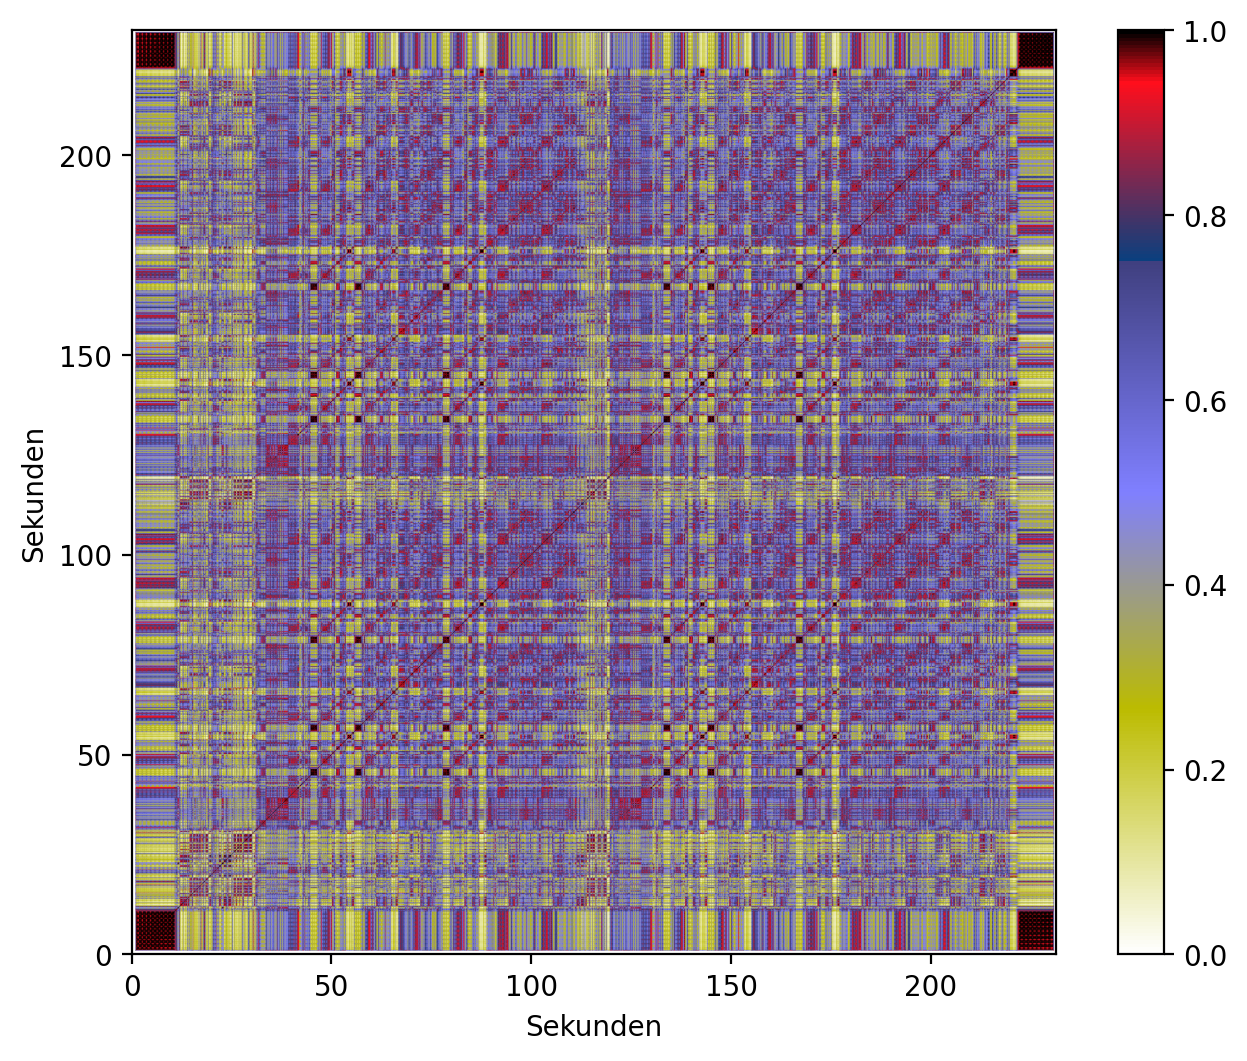

In [12]:
x_max = len(audio) / sr # Dauer in Sekunden
y_max = len(audio) / sr

plt.figure(figsize=(8, 6))
plt.imshow(ssm_audio, cmap='gist_stern_r', origin='lower', extent=[0, x_max, 0, y_max])
plt.xlabel('Sekunden')
plt.ylabel('Sekunden')
plt.colorbar()
plt.show()

In [14]:
threshold = 0.95
ssm_post_processed = ssm_audio.copy()
ssm_post_processed[ssm_post_processed < threshold] = 0

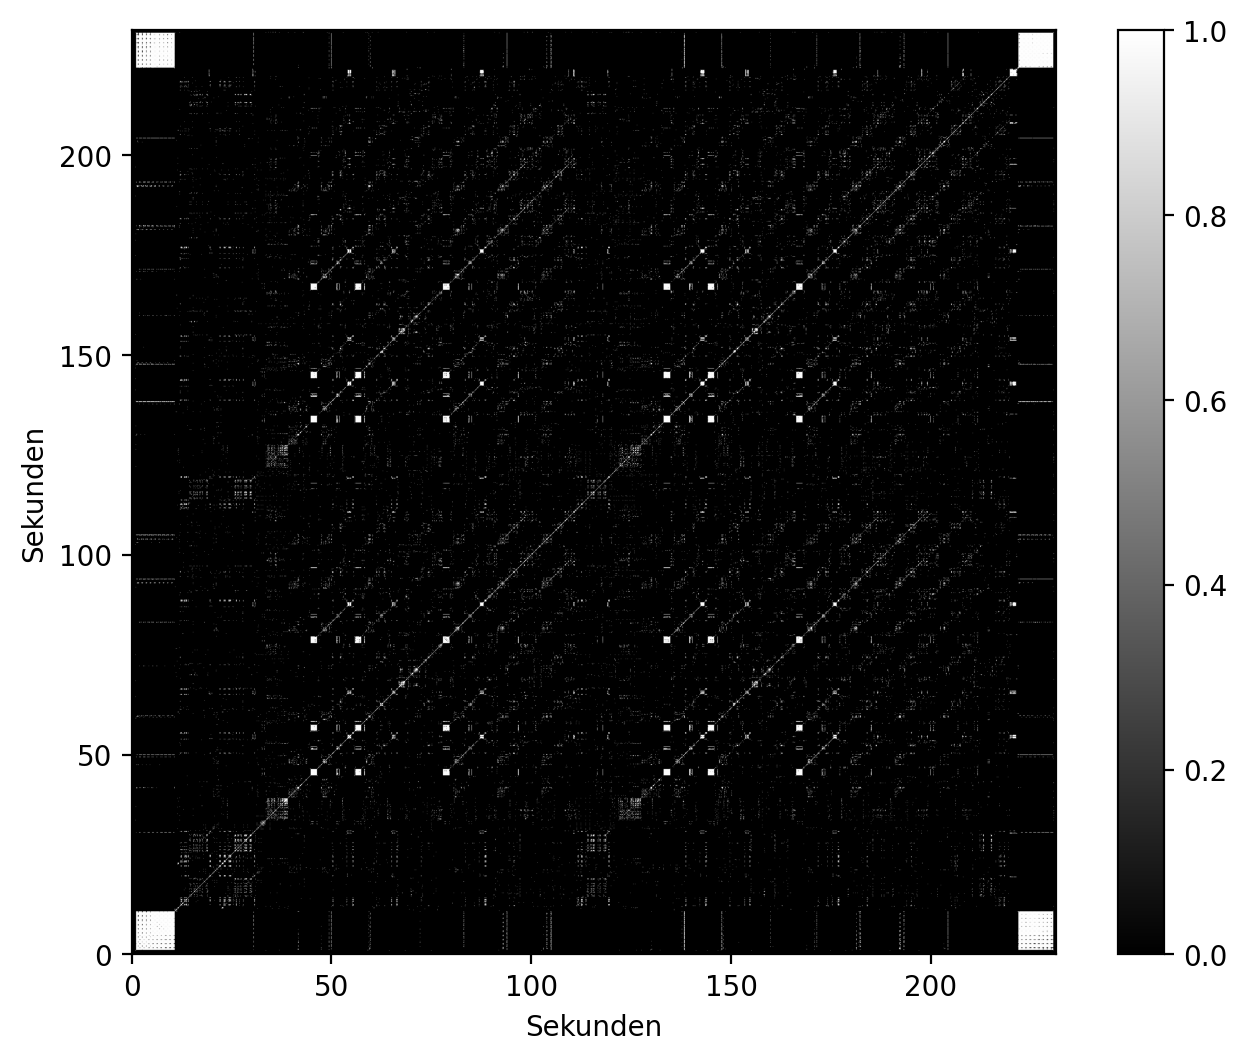

In [24]:
x_max = len(audio) / sr # Dauer in Sekunden
y_max = len(audio) / sr

plt.figure(figsize=(8, 6))
plt.imshow(ssm_post_processed, cmap='binary_r', origin='lower', extent=[0, x_max, 0, y_max])
plt.xlabel('Sekunden')
plt.ylabel('Sekunden')
plt.colorbar()
plt.show()

In [53]:
audio_file = "chandelier.mp3"
audio, sr = librosa.load(audio_file)
beginning_song_frame = 12 * sr
ending_song_frame = 220 * sr

In [52]:
audio = audio[beginning_song_frame:ending_song_frame]
chomagram_audio = librosa.feature.chroma_stft(y=audio, sr=sr, n_fft=4096, hop_length=2048)
ssm = SSM(chomagram_audio)
ssm[ssm < threshold] = 0

/opt/homebrew/Cellar/jupyterlab/4.5.1/libexec/lib/python3.14/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=4096 is too large for input signal of length=2490
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.5.1/libexec/lib/python3.14/site-packages/librosa/core/spectrum.py:380: RuntimeWarning: divide by zero encountered in scalar floor_divide
  util.MAX_MEM_BLOCK // (np.prod(y_frames.shape[:-1]) * y_frames.itemsize)
/opt/homebrew/Cellar/jupyterlab/4.5.1/libexec/lib/python3.14/site-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


ValueError: shapes (0,2) and (0,2) not aligned: 2 (dim 1) != 0 (dim 0)

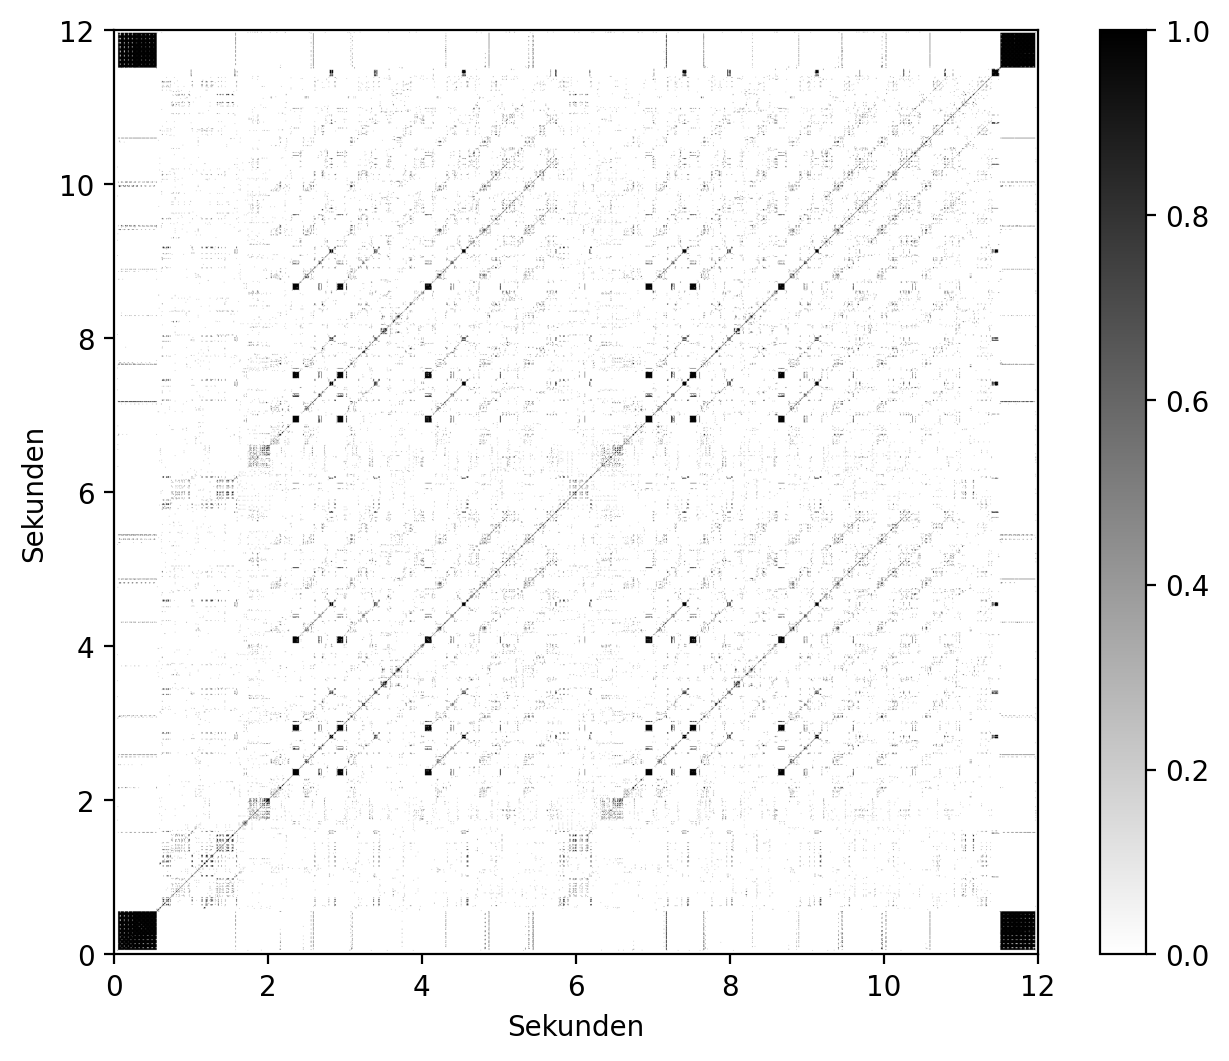

In [49]:
x_max = len(audio)  # Dauer in Sekunden
y_max = len(audio) 

plt.figure(figsize=(8, 6))
plt.imshow(ssm, cmap='binary', origin='lower', extent=[0, x_max, 0, y_max])
plt.xlabel('Sekunden')
plt.ylabel('Sekunden')
plt.colorbar()
plt.show()

In [42]:
def get_starting_frame(ssm, thumbnail_dur_seconds, sr, hop_length):
    # find optimal starting frame of the audio thumbnail
    numFramesSSM = len(ssm)
    numFramesThumbnail = int((thumbnail_dur_seconds*sr)/hop_length)
    lastStartingFrame = numFramesSSM - numFramesThumbnail

    thumbnailScores = np.zeros(lastStartingFrame)

    for i in range(lastStartingFrame):
        thumbnailScore_i = 0
        for frame in range(numFramesThumbnail):
            thumbnailScore_i = thumbnailScore_i + np.sum(ssm[:,i+frame])

        thumbnailScores[i] = thumbnailScore_i
    starting_frame = np.argmax(thumbnailScores)
    return starting_frame

In [46]:
print(get_starting_frame(ssm_post_processed, 15, sr, 2048))

11


In [ ]:
startSample = get_starting_frame(ssm_post_processed, 15, sr, 2048)